In [1]:
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import os

In [2]:
base_path = "archive/images/"

In [3]:
os.listdir(base_path + "train")

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

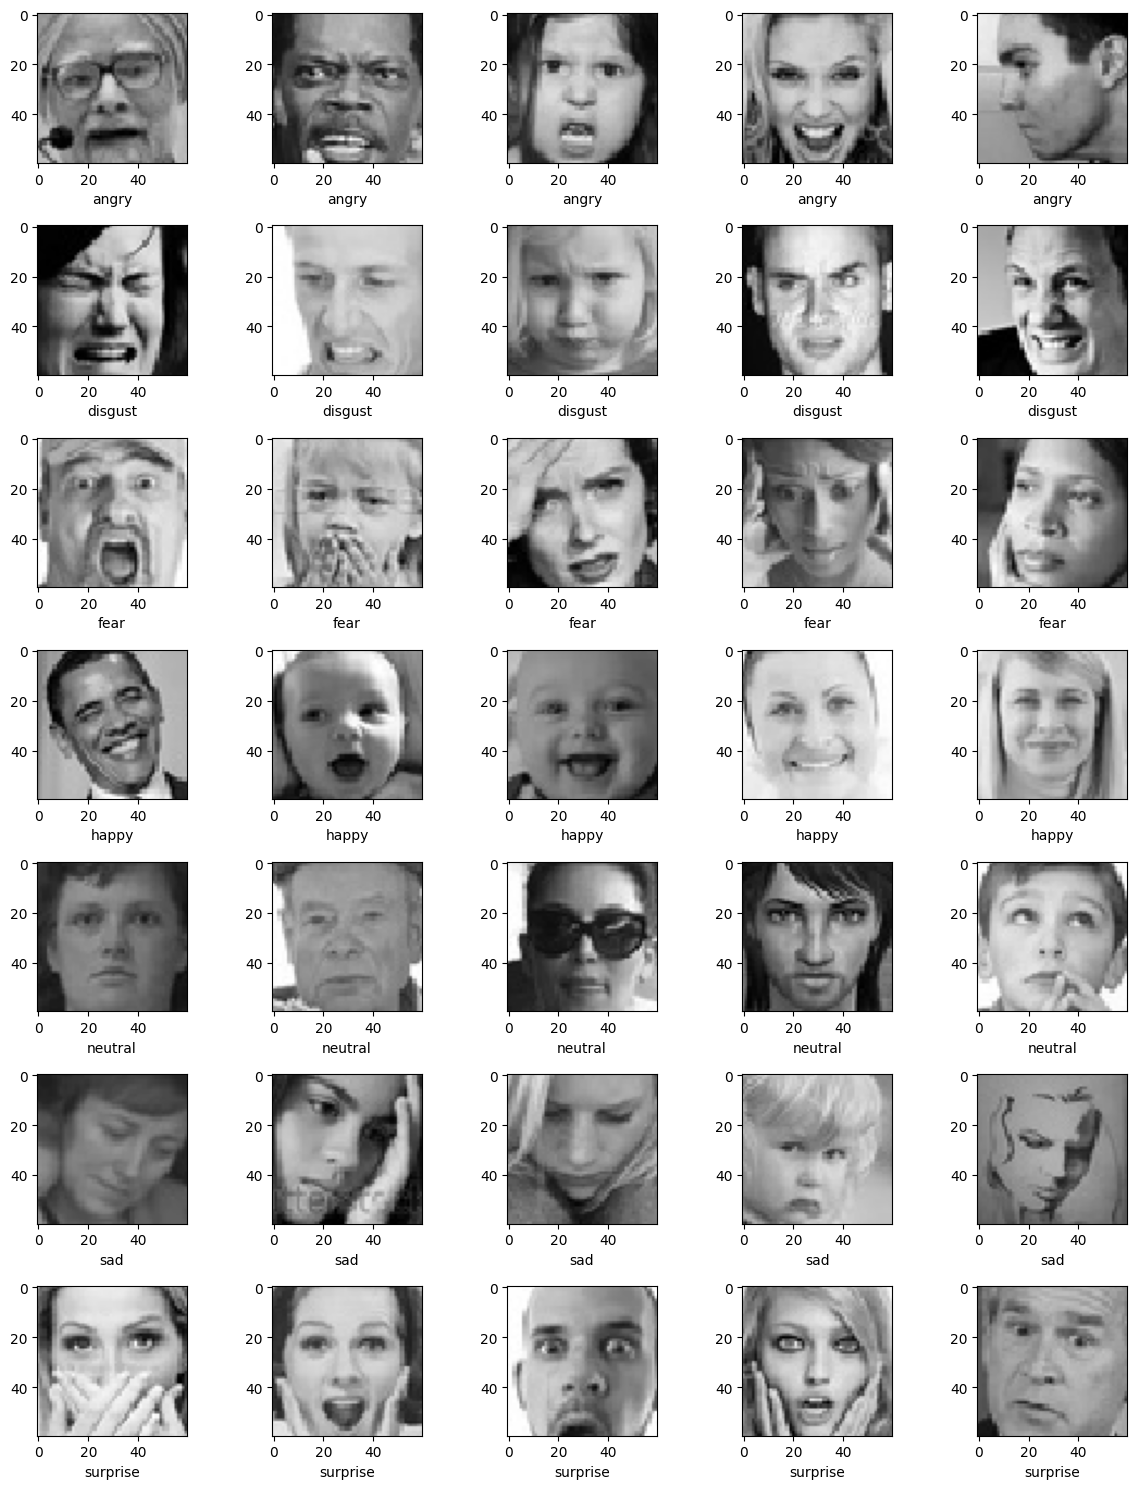

In [4]:
plt.figure(0, figsize=(12,15))
cpt = 0
pic_size = 60
for expression in os.listdir(base_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
        plt.xlabel(expression)

plt.tight_layout()
plt.show()

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [7]:
train_dir ="archive/images/train"
val_dir = "archive/images/validation"
batch_size = 128
img_height = 56
img_width = 56

train_generator = datagen.flow_from_directory(directory=train_dir,
                                              target_size=(img_height, img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')

val_generator = datagen.flow_from_directory(directory=val_dir,
                                            target_size=(img_height, img_width),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 7
inputs = Input(shape=(img_height, img_width, 3))
# 5 CNN Layer
#1
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
#2
x = Conv2D(128, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
#3
x = Conv2D(256, (3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D((2, 2))(x)
#4
x = Conv2D(512, (3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# 2 Dense Layer
#1
x = Flatten()(x)
#2
x = Dense(512, activation='relu')(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       295168

In [10]:
import tensorflow as tf

In [11]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy')

In [12]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = model(images, training=True)
        loss_value = loss_fn(labels, logits)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_loss(loss_value)
    train_accuracy(labels, logits)
    return loss_value

In [16]:
from keras.callbacks import ModelCheckpoint

In [17]:
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [18]:
epochs = 30
callbacks_list = [checkpoint]

In [19]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=train_generator.n//train_generator.batch_size,
                              epochs=epochs,
                              validation_data = val_generator,
                              validation_steps = val_generator.n//val_generator.batch_size,
                              callbacks=callbacks_list)

C:\Users\dongj\AppData\Local\Temp\ipykernel_27172\1516843592.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 1.7926 - accuracy: 0.2496
Epoch 1: val_accuracy improved from -inf to 0.26179, saving model to weights.best.hdf5
225/225 [==============================] - 621s 3s/step - loss: 1.7926 - accuracy: 0.2496 - val_loss: 1.7786 - val_accuracy: 0.2618
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 1.7833 - accuracy: 0.2522
Epoch 2: val_accuracy improved from 0.26179 to 0.27727, saving model to weights.best.hdf5
225/225 [==============================] - 619s 3s/step - loss: 1.7833 - accuracy: 0.2522 - val_loss: 1.7603 - val_accuracy: 0.2773
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 1.7546 - accuracy: 0.2692
Epoch 3: val_accuracy improved from 0.27727 to 0.29347, saving model to weights.best.hdf5
225/225 [==============================] - 617s 3s/step - loss: 1.7546 - accuracy: 0.2692 - val_loss: 1.7202 - val_accuracy: 0.2935
Epoch 4/30
225/225 [=============================

Epoch 28/30
225/225 [==============================] - ETA: 0s - loss: 1.1794 - accuracy: 0.5526
Epoch 28: val_accuracy did not improve from 0.54361
225/225 [==============================] - 616s 3s/step - loss: 1.1794 - accuracy: 0.5526 - val_loss: 1.2081 - val_accuracy: 0.5430
Epoch 29/30
225/225 [==============================] - ETA: 0s - loss: 1.1740 - accuracy: 0.5547
Epoch 29: val_accuracy improved from 0.54361 to 0.55369, saving model to weights.best.hdf5
225/225 [==============================] - 619s 3s/step - loss: 1.1740 - accuracy: 0.5547 - val_loss: 1.1910 - val_accuracy: 0.5537
Epoch 30/30
225/225 [==============================] - ETA: 0s - loss: 1.1677 - accuracy: 0.5568
Epoch 30: val_accuracy improved from 0.55369 to 0.55810, saving model to weights.best.hdf5
225/225 [==============================] - 617s 3s/step - loss: 1.1677 - accuracy: 0.5568 - val_loss: 1.1756 - val_accuracy: 0.5581


In [20]:
model.save('full_model.h5')

In [21]:
model.save_weights("model_weight.h5")

In [22]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

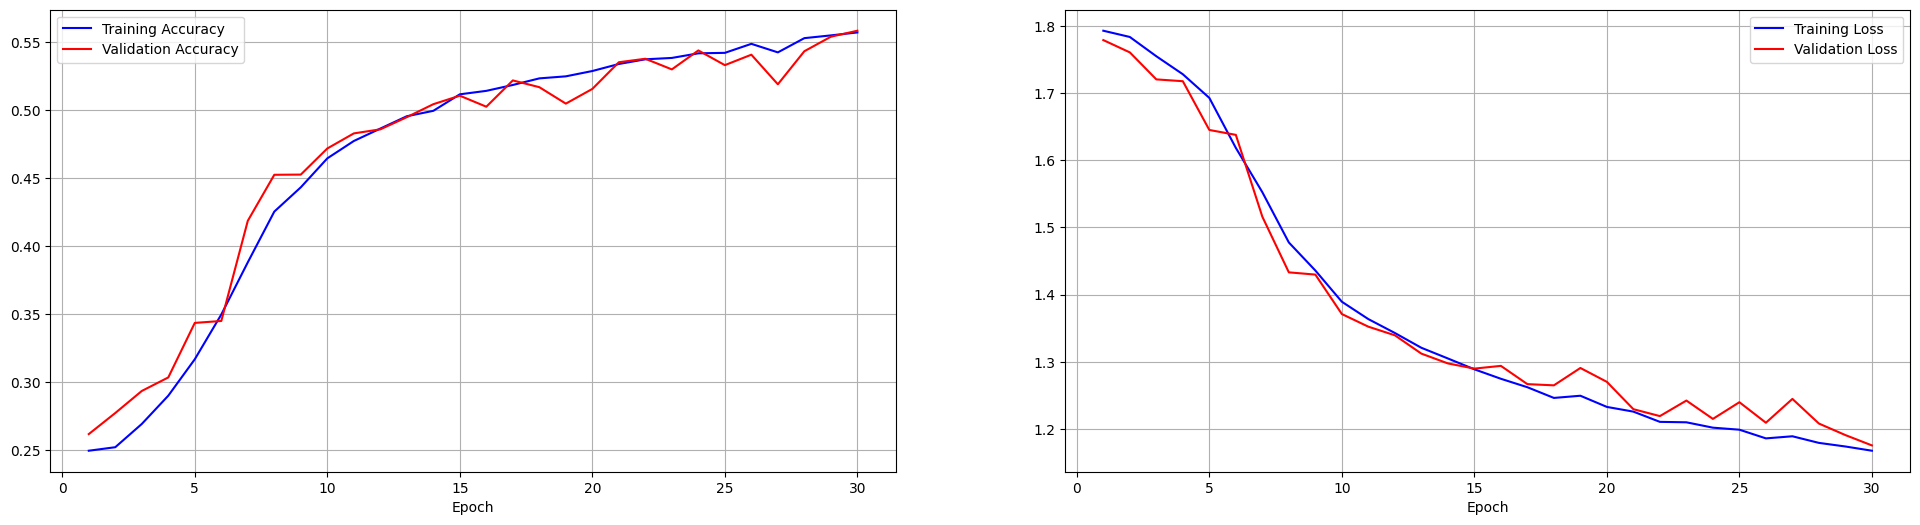

Best Validation Accuracy Score 0.55810, is for epoch 30


In [23]:
plot_results(history)
best_epoch =get_best_epcoh(history)